In this notebook, I have presented my capstone project for the Google Data Analytics Professional Certificate.

# INTRODUCTUION


**COMPANY**

Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.




**THE PHASES OF DATA ANALYSIS**

* Phase 1: Ask - A clear summary of the business task
* Phase 2: Prepare - A description of all data sources used
* Phase 3: Process - Documentation of any cleaning or manipulation of data
* Phase 4: Analyse - A summary of your analysis
* Phase 5: Share - Supporting visualizations and key findings
* Phase 6: Act - High-level ecommendations based on the analysis

# PHASE 1: ASK

**Business Task**


Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices, then apply these insights into Bellabeat's marketing strategy.


**Questions for Analysis:**

What are some trends in smart device usage?
How could these trends apply to Bellabeat customers?
How could these trends help influence Bellabeat marketing strategy?

# PHASE 2 : PREPARE


**Dataset used:**

The data source used for the case study is FitBit Fitness Tracker Data. This dataset is stored in Kaggle and was made available through Mobius.


**Information about dataset:**


The datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016 - 05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.


**Data Organization and verification:**

The data contains 18 CSV documents. Each document represents different quantitative data tracked by Fitbit. Every user has a unique ID and each person will have data in multiple rows since data is tracked by day and time.

# PHASE 3 : PROCESS

I will focus my analysis in R due to the accessibility, amount of data and to be able to create data visualization to share my results with stakeholders.


**Installing packages and opening libraries**


In [1]:
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(lubridate)
library(ggrepel)
library(dplyr)
library(ggplot2)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




**importing data sets**

In [2]:
daily_activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories<-read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_steps<-read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
sleep_day <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")


**previewing the selceted tables**

In [3]:
head(daily_activity,3)
head(daily_calories,3)
head(daily_steps,3)
head(sleep_day,3)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776


,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776


,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442


**cleaning and formatting the data**


checking the number of users whose data is available in each table 

In [4]:
n_unique(daily_activity$Id)
n_unique(sleep_day$Id)
n_unique(daily_calories$Id)
n_unique(daily_steps$Id)

[1] 33

[1] 24

[1] 33

[1] 33

checking if there are any duplicates

In [5]:
sum(duplicated(daily_activity))
sum(duplicated(sleep_day))
sum(duplicated(daily_calories))
sum(duplicated(daily_steps))


[1] 0

[1] 3

[1] 0

[1] 0

removing duplicates and na values from dataset

In [6]:
sleep_day <- sleep_day %>%
  distinct() %>%
  na.omit(sleep_day)

sum(duplicated(sleep_day))

[1] 0

formatting time and date columns 

In [7]:
daily_activity$ActivityDate=as.POSIXct(daily_activity$ActivityDate,
                                       format = "%d/%m/%Y",tz = Sys.timezone())
  
sleep_day$SleepDay=as.POSIXct(sleep_day$SleepDay, 
                              format = "%m/%d/%Y %I:%M:%S %p",tz = Sys.timezone())


**formatting data to make further analysis easier**


renaming column for easier merging 

In [8]:
sleep_day <- rename(sleep_day, ActivityDate = SleepDay)

obtaing day of week from date

In [9]:
daily_activity<- daily_activity%>%
  mutate(Day=weekdays(daily_activity$ActivityDate))

converting mintues to hours 

In [10]:
sleep_day<- sleep_day%>%
  mutate(Day=weekdays(sleep_day$ActivityDate))%>%
  mutate(Hours_slept=sleep_day$TotalMinutesAsleep/60)

head(sleep_day)


,Id,ActivityDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day,Hours_slept
,<dbl>,<dttm>,<int>,<int>,<int>,<chr>,<dbl>
1,1503960366,2016-04-12,1,327,346,Tuesday,5.450000
2,1503960366,2016-04-13,2,384,407,Wednesday,6.400000
3,1503960366,2016-04-15,1,412,442,Friday,6.866667
4,1503960366,2016-04-16,2,340,367,Saturday,5.666667
5,1503960366,2016-04-17,1,700,712,Sunday,11.666667
6,1503960366,2016-04-19,1,304,320,Tuesday,5.066667


**merging datasets**

In [11]:
daily_activity_sleep <- merge(daily_activity, sleep_day, by=c ("Id","ActivityDate","Day"))
daily_activity_sleep

Id,ActivityDate,Day,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Hours_slept
<dbl>,<dttm>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1503960366,2016-05-05,Thursday,14070,8.90,8.90,0.000000,2.92,1.08,4.88,0.00,45,24,250,857,1959,1,247,264,4.116667
2026352035,2016-05-05,Thursday,12167,7.54,7.54,0.000000,0.00,0.00,7.54,0.00,0,0,475,479,1926,1,468,485,7.800000
3977333714,2016-05-05,Thursday,12312,8.58,8.58,0.000000,1.76,4.11,2.71,0.00,14,88,178,680,1618,1,318,480,5.300000
4020332650,2016-05-05,Thursday,11728,8.43,8.43,0.000000,2.62,1.68,4.04,0.07,38,42,196,916,3429,1,226,248,3.766667
4388161847,2016-05-05,Thursday,9603,7.38,7.38,0.000000,0.63,1.67,5.09,0.00,12,39,199,896,2899,1,471,495,7.850000
4445114986,2016-05-05,Thursday,3800,2.55,2.55,0.000000,0.12,0.24,2.18,0.00,2,6,185,734,2120,2,462,513,7.700000
4702921684,2016-05-05,Thursday,8614,6.99,6.99,0.000000,0.67,0.22,6.09,0.00,8,5,241,745,3006,1,414,428,6.900000
5553957443,2016-05-05,Thursday,14331,9.51,9.51,0.000000,3.43,1.66,4.43,0.00,44,29,241,692,2156,1,419,464,6.983333
5577150313,2016-05-05,Thursday,7550,5.64,5.64,0.000000,2.50,0.47,2.67,0.00,45,21,143,1153,3004,1,74,78,1.233333


# PHASE 4 : ANALYSE 

**Usage Type Distribution**

Here i will find out how often the people use their watches. 
I have assumed that days where total steps taken were less than 300 are classified as no use.


The following designations have been assigned to the users based on their frequency of wearing the watch.
1. Low Use - 1 to 14 days 
1. Moderate Use - 15 to 21 days
1. High Use - 22 to 31 days

In [12]:
daily_use2 <- daily_activity %>%
  filter(TotalSteps >300 ) %>% 
  group_by(Id) %>%
  summarize(ActivityDate=sum(n())) %>%
  mutate(usage = case_when(
    ActivityDate >= 1 & ActivityDate <= 14 ~ "Low Use",
    ActivityDate >= 15 & ActivityDate <= 21 ~ "Moderate Use", 
    ActivityDate >= 22 & ActivityDate <= 31 ~ "High Use")) %>% 
  mutate(usage = factor(usage, level = c('Low Use','Moderate Use','High Use'))) %>% 
  rename(days_used = ActivityDate) %>% 
  group_by(usage)

# previewing the new table
head(daily_use2)

Id,days_used,usage
<dbl>,<int>,<fct>
1503960366,30,High Use
1624580081,31,High Use
1644430081,30,High Use
1844505072,17,Moderate Use
1927972279,14,Low Use
2022484408,31,High Use


A visulaisation showing the distriburion of user types

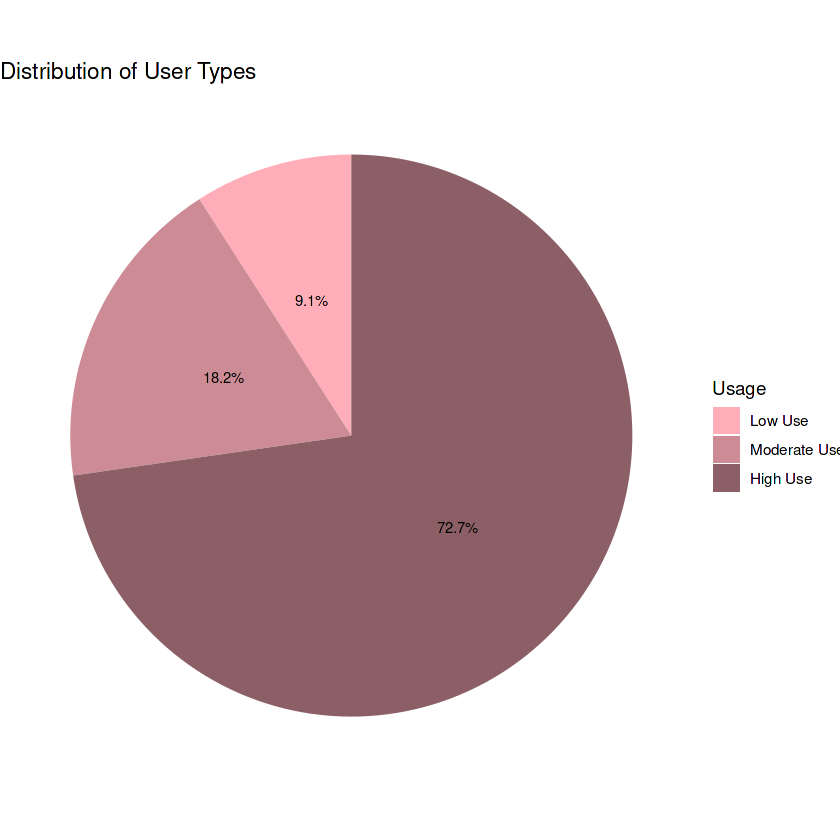

In [13]:
# Count the number of users in each usage category
usage_counts <- count(daily_use2, usage)

#displaying a pie chart on the distribution of user types
pie_chart <- ggplot(usage_counts, aes(x = "", y = n, fill = usage, label = scales::percent(n / sum(n)))) +
  geom_bar(stat = "identity", width = 1) +
  geom_text(position = position_stack(vjust = 0.5), size = 3) +
  coord_polar("y", start = 0) + 
  labs(title = "Distribution of User Types") +
  scale_fill_manual(values = c( "lightpink1","lightpink3", "lightpink4"),name = "Usage") +
  theme_void() +
  theme(legend.position = "right")
print(pie_chart)

*Interpretation-*


73% of the users of our sample use their device frequently - between 22 to 31 days.


18% use their device for 15 to 21 days.


9.1% of our sample rarely use their device.

**Activity Level of Users**

I have classified the users by their activity level by considering their daily amount of steps.

the users have been categoriesd as follows: 
1. sedentary - less than 5000
1. lightly active - between 5000 and 7499
1. fairly active - between 7500 and 9999
1. very active - more than 10000

In [14]:
# Define the levels of activity_level
activity_levels <- c("sedentary", "lightly_active", "fairly_active", "very_active")

# Convert activity_level to factor with predefined levels
daily_avg_steps <- daily_steps %>%
  group_by(Id) %>%
  summarise(daily_steps = mean(StepTotal)) %>%
  mutate(activity_level = factor(case_when(
    daily_steps >= 1 & daily_steps < 5000 ~ "sedentary",
    daily_steps >= 5000 & daily_steps <= 7499 ~ "lightly_active", 
    daily_steps >= 7500 & daily_steps <= 9999 ~ "fairly_active",
    daily_steps >= 10000 ~ "very_active"
  ), levels = activity_levels))

head(daily_avg_steps)

Id,daily_steps,activity_level
<dbl>,<dbl>,<fct>
1503960366,12116.742,very_active
1624580081,5743.903,lightly_active
1644430081,7282.967,lightly_active
1844505072,2580.065,sedentary
1927972279,916.129,sedentary
2022484408,11370.645,very_active


visualisation showing the activity levels of users

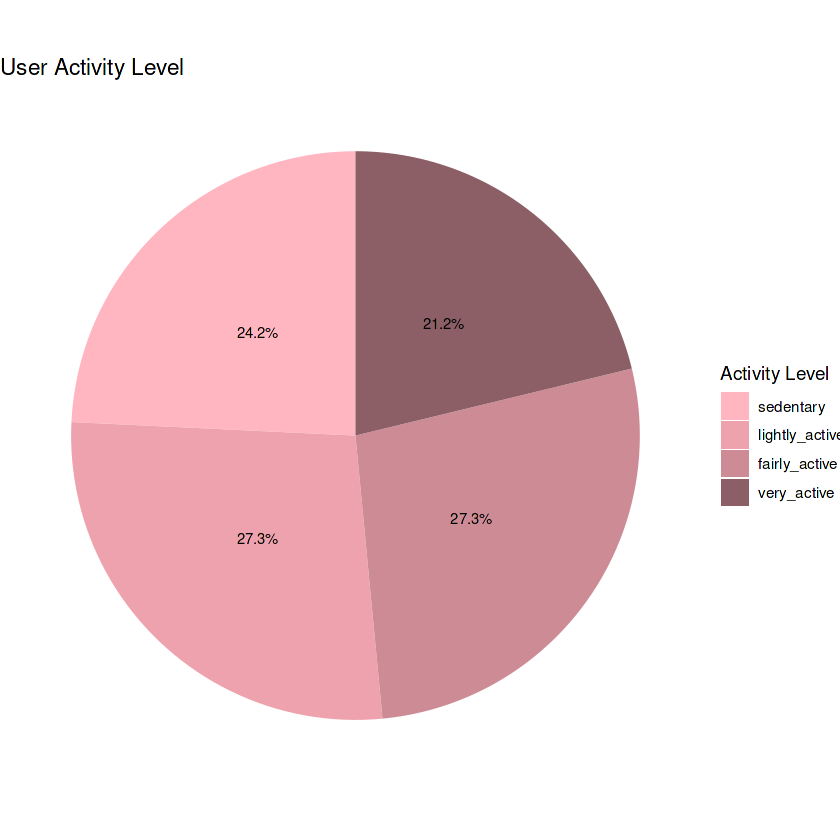

In [15]:
# Count the number of users in each usage category
user_count <- count(daily_avg_steps, activity_level)

# Displaying a pie chart on user type
pie_chart2 <- ggplot(user_count, aes(x = "", y = n, fill = activity_level, label = scales::percent(n / sum(n)))) +
  geom_bar(stat = "identity", width = 1) +
  geom_text(position = position_stack(vjust = 0.5), size = 3) +
  coord_polar("y", start = 0) + 
  labs(title = "User Activity Level") +
  scale_fill_manual(values = c("lightpink" ,"lightpink2", "lightpink3", "lightpink4"), name = "Activity Level",
                    breaks = activity_levels) +  # Set breaks to predefined levels
  theme_void() +
  theme(legend.position = "right")

# Display the pie chart
print(pie_chart2)


*Interpretation-*


we can see that the device is used by women of all activity levels.


there is not much diffrence between the number of users who are in diffrent categories of steps taken.


**Average Calories Per Day**


the average calories burnt by a user in a day

Day,mean_cal
<fct>,<dbl>
Friday,2289
Monday,1812
Saturday,2334
Sunday,2383
Thursday,2415
Tuesday,2253


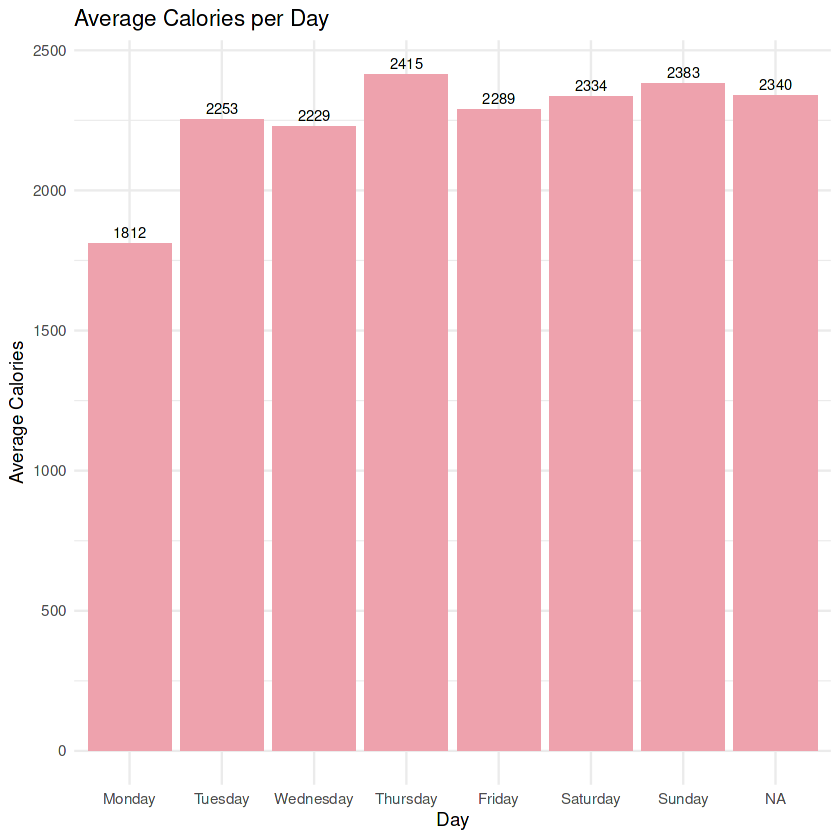

In [16]:
cal_day<- daily_activity %>%
  group_by(Day) %>%
  summarise(mean_cal=round(mean(Calories))) %>%
  mutate(Day=factor(Day, level=c('Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday')))
head(cal_day)


# displaying findings in a bar chart
ggplot(cal_day, aes(x = Day, y = mean_cal)) +
  geom_bar(stat = "identity", fill = "lightpink2") +
  geom_text(aes(label = mean_cal), vjust = -0.5, color = "black", size = 3) +labs(title = "Average Calories per Day", x = "Day", y = "Average Calories") +
  theme_minimal()


Interpretation

users burnt the maximum calories on Thursday. Which implies the highest level of activty is on this day.
users burnt the lowest calories on Monday.

**Average Steps Per Day**

Day,mean_step
<fct>,<dbl>
Friday,7049
Monday,6163
Saturday,8088
Sunday,7889
Thursday,8731
Tuesday,6936


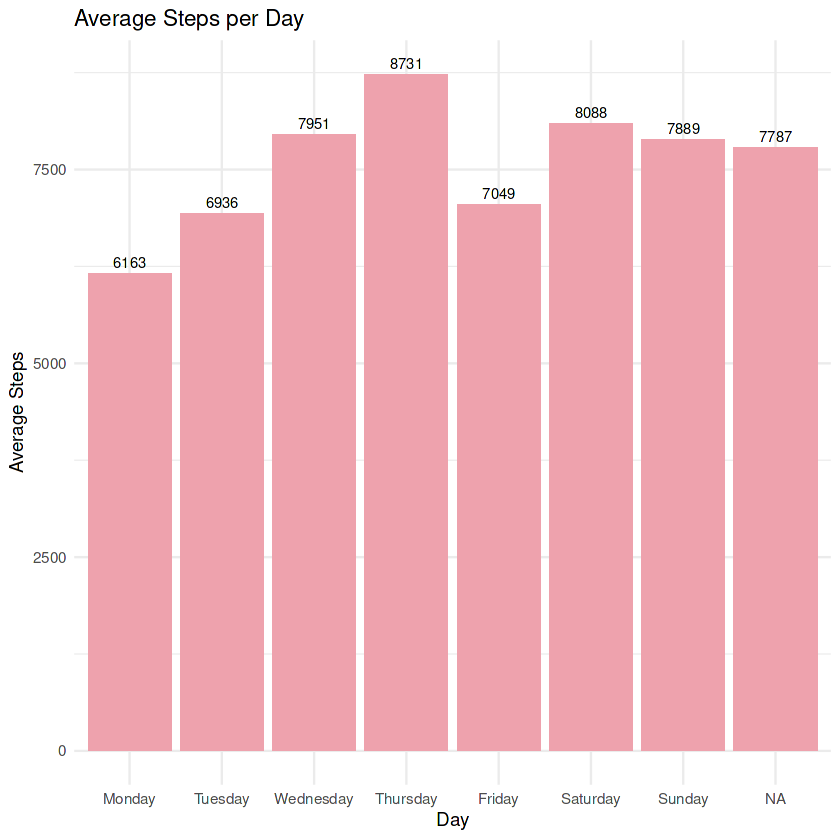

In [18]:
# calculating average steps per day
step_day<- daily_activity %>%
  group_by(Day) %>%
  summarise(mean_step=round(mean(TotalSteps))) %>%
  mutate(Day=factor(Day, level=c('Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday')))
head(step_day)

#creating visualisation
ggplot(step_day, aes(x = Day, y = mean_step)) +
  geom_bar(stat = "identity", fill = "lightpink2") +
  geom_text(aes(label = mean_step), vjust = -0.5, color = "black", size = 3) +labs(title = "Average Steps per Day", x = "Day", y = "Average Steps") +
  theme_minimal()

**Total Steps VS Calories Burnt**

finding the correlation between total steps taken by a user and the amount of calories burnt.


[1] 0.5915681


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


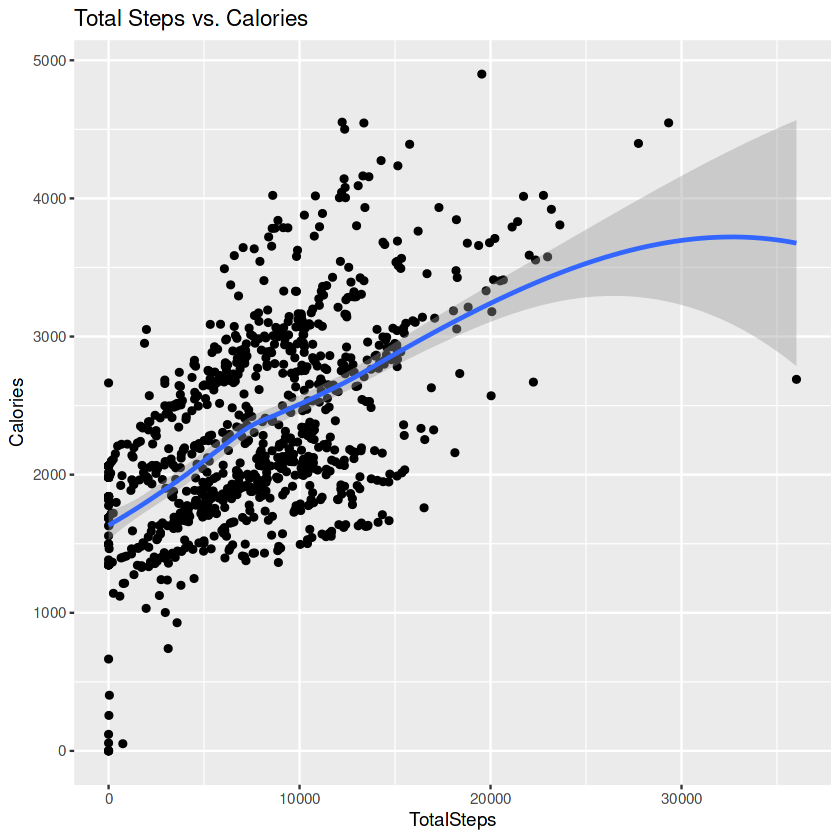

In [19]:
corr=cor(daily_steps$StepTotal,daily_calories$Calories)
print(corr)
ggplot(data = daily_activity,aes(x=TotalSteps, y=Calories)) + geom_point() + geom_smooth() + labs(title = "Total Steps vs. Calories")

*Interpretation:*

The value 0.59 indicates a moderate to strong positive linear relationship between total steps and calories. It means that users who take more steps tend to burn more calories. 

**Average Sleep Per Day**

Day,mean_sleep
<fct>,<dbl>
Friday,6.757018
Monday,6.991667
Saturday,6.984503
Sunday,7.545758
Thursday,6.688281
Tuesday,6.742308


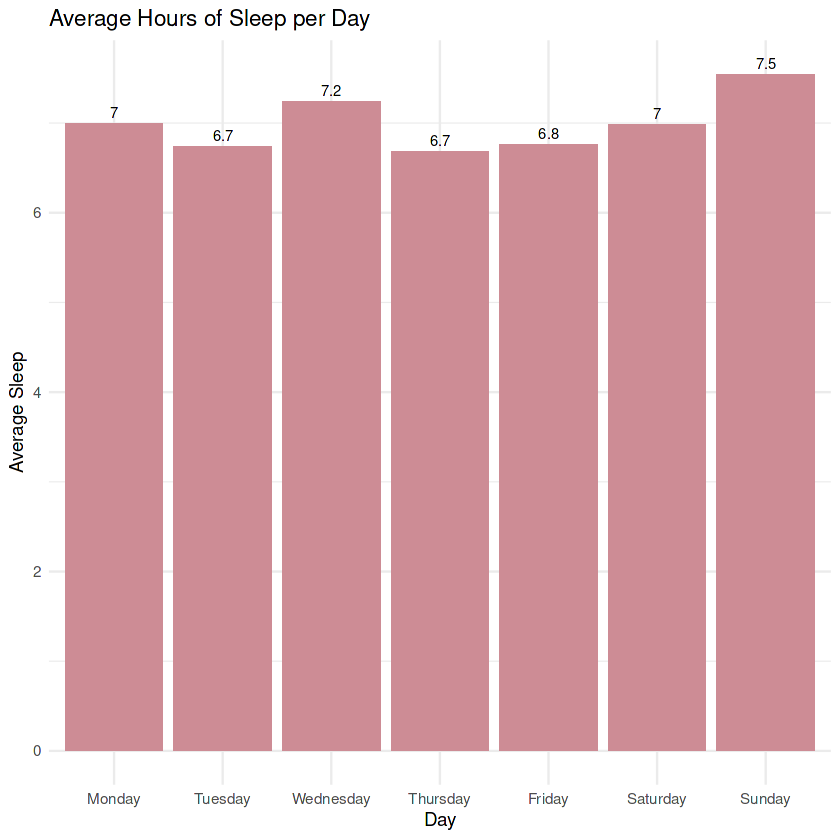

In [20]:
#calculating average hours of sleep
sleep_day<-na.omit(sleep_day)
weekday_sleep <- sleep_day %>%
  group_by(Day)%>%
  summarise(mean_sleep=mean(Hours_slept))%>%
  mutate(Day=factor(Day, level=c('Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday')))
head(weekday_sleep)

# creating visualisation
ggplot(weekday_sleep, aes(x = Day, y = mean_sleep)) +
  geom_bar(stat = "identity", fill = "lightpink3") +
  geom_text(aes(label = round(mean_sleep, 1)), vjust = -0.5, color = "black", size = 3) +  # Add text labels on top of bars
  labs(title = "Average Hours of Sleep per Day", x = "Day", y = "Average Sleep") +
  theme_minimal()



*Interpretation-*

According to American Academy of Sleep Medicine and the Sleep Research Society a adult needs 7-9hrs of sleep for optimum health.

users are obtaining the reccomended sleep on most days

# PHASE 5 : SHARE

**FINDINGS**

* High User Engagement:
    * 73% of users are "high use," engaging with their devices 22-31 days per month.
    * 18% are "moderate use," engaging 15-21 days per month.
    * 9.1% are "low use," engaging 1-14 days per month.



* Activity Levels:
    * Users are evenly distributed across activity levels: sedentary (<5000 steps), lightly active (5000-7499 steps), fairly active (7500-9999 steps), and very active (>10000 steps).



* Steps and Calories Correlation:
    * There is a moderate to strong positive correlation (0.59) between total steps taken and calories burned.
    
    
    
* Sleep Patterns:
    * Users are generally obtaining the recommended 7-9 hours of sleep per night.

# PHASE 6 : ACT

**Recommendations:**

* Engage Frequent Users: Highlight advanced features like detailed activity tracking, personalized fitness insights, and offer exclusive content for users who use their devices 22-31 days a month.


* Motivate Low Usage Users: Introduce fun elements like challenges and rewards to encourage users who use their devices less frequently to increase their engagement.


* Cater to All Activity Levels: Showcase the benefits of Bellabeat devices for all types of users—whether they are sedentary, lightly active, fairly active, or very active. Make sure everyone feels included.


* Promote Health Benefits: Use data to demonstrate how taking more steps with Bellabeat devices helps burn more calories and reach fitness goals.


* Focus on Sleep: Create educational content about the importance of sleep. Show how Bellabeat devices help users get the recommended 7-9 hours of sleep, featuring real-life testimonials and success stories.


* Foster Community: Promote challenges, rewards, and exclusive content to keep users engaged and build a sense of community among Bellabeat users.